# Homework 3

3.6) Let $\|\cdot\|$ denote any norm on $\mathbb{C}^m$. The corresponding *dual norm*  $\|\cdot\|'$ is defined by the formula $\|\cdot\|' = sup_{\|y\|=1}\|y^*x\|$

a) Prove that $\|\cdot\|'$ is a norm.

A function $\|\cdot\|: \mathbb{C}^m \rightarrow \mathbb{R}$ is a norm iff:

* (Nonnegativity) $\|x\| \geq 0$, $\|x\| = 0 \Leftrightarrow x = 0$
* (Triangle Inequality) $\|x+y\| \leq \|x\| + \| y \|$
* (Scaling) $\|\alpha x\| = |\alpha|\|x\|$  for a scalar $\alpha$,

i-) $sup_{\|y\|=1}\|y^*x\| = \sqrt{\sum_{i=1}^m |y_ix_i |^2}  \geq 0 \longrightarrow $ (Nonnegativity holds).

ii-) 
\begin{eqnarray}
sup_{\|y\|=1}\|\alpha y^*x\| &=& \sqrt{\sum_{i=1}^m |\alpha y_ix_i |^2} \\
&=& \sqrt{\alpha^2\sum_{i=1}^m |y_ix_i |^2} \\
&=& \alpha \cdot sup_{\|y\|=1}\|y^*x\| \longrightarrow \text{(Scaling holds)}
\end{eqnarray} 

iii-)
\begin{eqnarray}
\|x+z\|'&=& sup_{\|y\|=1} |y^*(x+z)| \\
&=& sup_{\|y\|=1} | y^*x + y^*z | \\
&\leq& sup_{\|y\|=1} | y^*x| + sup_{||y||=1} |y^*z | 
&=& ||x||' + ||z||' \longrightarrow \text{( Triangle Inequality holds)}
\end{eqnarray}


4.5) Theorem 4.1 asserts that every A ∈ $\mathbb{C}^{m\times n}$ has an SVD $A =  \scriptstyle U\sum V^*$. Show that if A is real, then it has a real SVD (*U* ∈ $\mathbb{R}^{m\times m}, V ∈ \mathbb{R}^{n\times n}$).

\begin{eqnarray}
A^*A &=& (\textstyle U\sum V^*)^*(\textstyle U\sum V^*) \\
&=& \textstyle V \sum^* \sum V^*  \longrightarrow \text{if A is real then} \\
A^TA&=& VDV^T ∈ \mathbb{R}^{n\times n},  \hspace{2mm}\text{where} \hspace{2mm}D = (\scriptstyle\sum)^T \sum 
\end{eqnarray}
D is a diagonal real matrix with nonnegative elements.
$$ \sum = \sqrt{D} ∈ \mathbb{R}^{n\times n}$$

If m > n, (m-n) many zero rows are added to $\sum$, else if m < n then (n-m) zero columns are added to $\sum$ 

$$ AV = U \textstyle \sum \longrightarrow V^TV = I $$ 

We can solve the system to find U ∈ $\mathbb{R}^{m\times m}$ having that A,$\scriptstyle \sum$ and V are real matrices.


a)
U =

   0.70711  -0.70711
   0.70711   0.70711

sigma =

Diagonal Matrix

   14.1421         0
         0    7.0711

Vtr =

  -0.60000   0.80000
   0.80000   0.60000

b)
c)
1-norm: 16 
2-norm: 14.14 
Inf-norm: 15 
F-norm: 15.81
d)
Ainverse =

  -0.110000   0.050000
  -0.020000   0.100000

e)
eigenValues =

   1.5000 + 9.8869i
   1.5000 - 9.8869i

f)
detOfA =  100
prodOfEigens =  100.00
g)
Area =  314.16


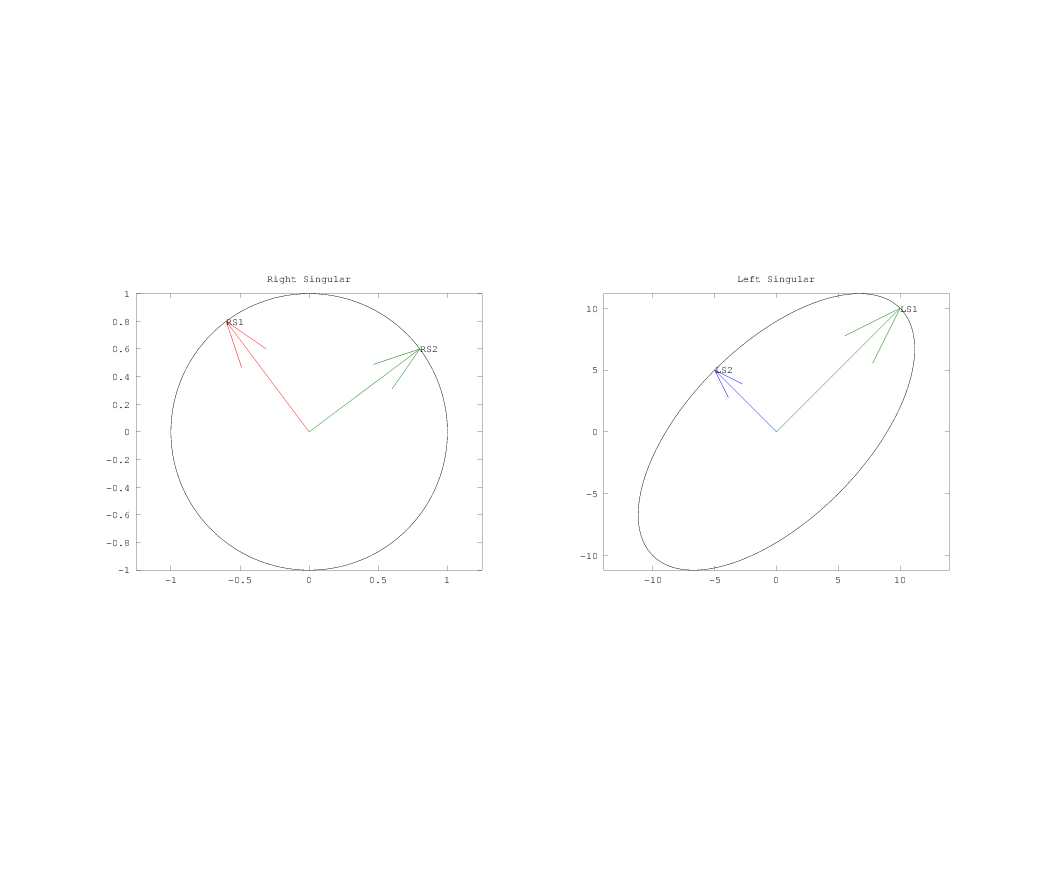

In [19]:
#Calculates and returns eigenvalues of given matrix
function vals = calcEigenVals(M)
vals = roots([1 -(M(1,1)+M(2,2)) (M(1,1)*M(2,2)-M(1,2)*M(2,1))]);
end

#Calculates and returns norm of given column
function normVal = calcNorm(c)
normVal = sqrt(sumsq(c));
end

#Calculates and returns 2-norm of given matrix
function matNorm = matNormCustom(A)
    matNorm = max(sum(A(:,1)),sum(A(:,2)));
end

function  svdCustom(A)
    M = A*A';
    N = A'*A;
    v = calcEigenVals(M);
    U = zeros(2);
    sigma = diag(sqrt(v));
    Vtr = zeros(2);
        #Calculate U matrix
        for i = 1:2
            T = M-v(i)*eye(2);
            c = [-T(1,2)/T(1,1) 1]';
            U(:,i) = c/calcNorm(c);
        end
        #Calculate V* matrix
        for i = 1:2
            T = N-v(i)*eye(2);
            c = [-T(1,2)/T(1,1) 1]';
            Vtr(:,i) = c/calcNorm(c);
        end
    disp('a)');
        U
        sigma
        Vtr
    disp('b)');
        #Get left and right singular vectors
        lSingular = U*sigma;
        V = Vtr';
        
        labels = {'RS1';'RS2';'LS1';'LS2'};
        #Unit circle and right singular vectors plotted
        figure('Position', [100, 100, 1049, 895]);
        t = 0 : .01 : 2*pi;
                x = cos(t);
                y = sin(t);
                axis equal
                X = [x;y];       
                subplot(1, 2, 1);
                plot(x, y, "color", "Black");
                hold on;
                quiver(0, 0, V(1,1), V(2,1),'autoscale','off', "color", "Red");
                quiver(0, 0, V(1,2), V(2,2), 'autoscale','off',"color", [0 0.5 0]);
                title('Right Singular');
                text(V(1,1),V(2,1),labels(1))
                text(V(1,2),V(2,2),labels(2))

                axis equal;
                
                # Obtain image of the unit circle and plot left singular vectors
                y = A*X;
                subplot(1, 2, 2);
                 plot(y(1,:), y(2,:),"color","Black"); 
                 hold on;
                 quiver(0, 0, lSingular(1,1), lSingular(2,1),'autoscale','off', "color", [0 0.5 0]);
                 quiver(0, 0, lSingular(1,2), lSingular(2,2), 'autoscale','off',"color", "Blue");
                 title('Left Singular');
                 text(lSingular(1,1),lSingular(2,1),labels(3))
                 text(lSingular(1,2),lSingular(2,2),labels(4))  
                 axis equal;


    disp('c)');
        fprintf('1-norm: %d \n',matNormCustom(abs(A)));
        x = max(diag(sigma));
        fprintf('2-norm: %.4d \n',x);
        fprintf('Inf-norm: %d \n',matNormCustom(abs(A')));
        x = sqrt(sum(v));
        fprintf('F-norm: %.4d\n',x);    
    disp('d)');
        Ainverse = Vtr'*pinv(sigma)*U';
        Ainverse
    disp('e)');
        eigenValues = calcEigenVals(A);
        eigenValues
    disp('f)');
        detOfA = det(A);
        prodOfEigens = prod(eigenValues);
        detOfA
        prodOfEigens
    disp('g)');
        Area = pi*prod(diag(sigma));
        Area
end

A =[-2 11;-10 5];
#B =[-2+i 3-i;-1+i 4+2*i];
svdCustom(A);

